## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 08 : Pembelajaran Mendalam </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [40]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Gempar Bambang Godata"
myNIM = "00000056133"

In [41]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		00000056133
Start: 		2023-04-17 16:27:14.810346
Device ID: 	0a232b26-dd02-11ed-a940-acf234e5a95e


### Deskripsi Singkat Dataset:

Data set ini ini mencakup 27305 baris dan 5 kolom berisi gambar wajah yang diberi label berdasarkan usia, jenis kelamin, dan etnis.


---

### Dataset yang dipakai:

1. Age, Gender, and Ethnicity (Face Data) – sumber : https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv

---

### Hasil kerja

# Test Environment

## Import Library

In [4]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
conda activate tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

### Import library lain

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Pandas 1.4.2
Scikit-Learn 1.0.2


### Modul

In [5]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

print("shape of x_train: {}".format(x_train.shape))
print("shape of y_train: {}".format(y_train.shape))
print()
print("shape of x_test: {}".format(x_test.shape))
print("shape of y_test: {}".format(y_test.shape))

11490434/11490434 [==============================] - 17s 1us/step
shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)

shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)


In [6]:
from IPython.display import display
import pandas as pd 
pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',5)

print('Shape for dataset: {}'.format(x_train.shape))
print('labels: {}'.format(y_train))

single=x_train[0]
print('shape for single: {}'.format(single.shape))
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
labels: [5 0 4 ... 5 6 8]
shape for single: (28, 28)


,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


image (#105): which is digit '1'


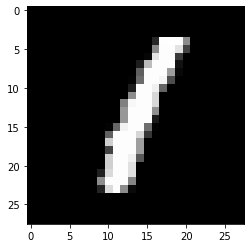

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
digit=105
a=x_train[digit]
plt.imshow(a,cmap='gray',interpolation='nearest')
print("image (#{}): which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

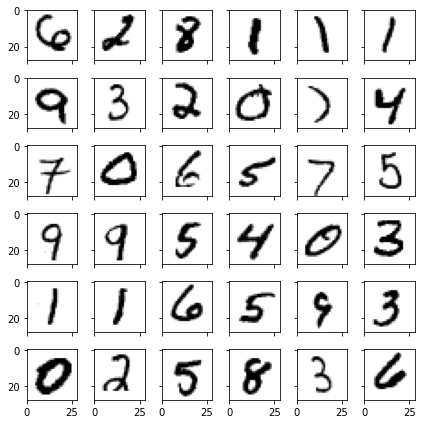

In [8]:
import random 
ROWS =6
random_indices=random.sample(range(x_train.shape[0]), ROWS*ROWS)
sample_images=x_train[random_indices,:]
plt.clf()
fig,axes=plt.subplots(ROWS,ROWS,
                     figsize=(ROWS,ROWS),
                     sharex=True, sharey=True)
for i in range (ROWS*ROWS):
    subplot_row=i//ROWS
    subplot_col=i%ROWS
    ax=axes[subplot_row,subplot_col]
    
    plottable_image=np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image,cmap='gray_r')
    ax.set_xbound([0,28])
plt.tight_layout()
plt.show()

In [9]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10 
epochs = 12

img_rows, img_cols = 28,28
if K.image_data_format() == 'channels_first':
    x_train=x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test=x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape=(1, img_rows, img_cols)
else: 
    x_train=x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test=x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape=(img_rows, img_cols, 1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('training samples: {}'.format(x_train.shape[0]))
print('test samples: {}'.format(x_test.shape[0]))

x_train shape: (60000, 28, 28, 1)
training samples: 60000
test samples: 10000


In [10]:
y_train=tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test=tensorflow.keras.utils.to_categorical(y_test, num_classes)
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())         
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [11]:
import tensorflow as tf
import time 
start_time=time.time()
model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=2,
         validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

Epoch 1/12
469/469 - 51s - loss: 0.1873 - accuracy: 0.9428 - val_loss: 0.0511 - val_accuracy: 0.9833 - 51s/epoch - 109ms/step
Epoch 2/12
469/469 - 60s - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0332 - val_accuracy: 0.9900 - 60s/epoch - 128ms/step
Epoch 3/12
469/469 - 92s - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0323 - val_accuracy: 0.9896 - 92s/epoch - 195ms/step
Epoch 4/12
469/469 - 91s - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0288 - val_accuracy: 0.9904 - 91s/epoch - 194ms/step
Epoch 5/12
469/469 - 94s - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0276 - val_accuracy: 0.9920 - 94s/epoch - 199ms/step
Epoch 6/12
469/469 - 93s - loss: 0.0216 - accuracy: 0.9927 - val_loss: 0.0288 - val_accuracy: 0.9913 - 93s/epoch - 199ms/step
Epoch 7/12
469/469 - 93s - loss: 0.0182 - accuracy: 0.9937 - val_loss: 0.0374 - val_accuracy: 0.9890 - 93s/epoch - 199ms/step
Epoch 8/12
469/469 - 93s - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0303 - val_accuracy: 0.9919 - 93s/epoch - 198

In [12]:
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

test loss: 0.04201454296708107
test accuracy: 0.9918000102043152


In [13]:
from sklearn import metrics

small_x=x_test[1:100]
small_y=y_test[1:100]
small_y2=np.argmax(small_y,axis=1)
pred=model.predict(small_x)
pred=np.argmax(pred,axis=1)
score=metrics.accuracy_score(small_y2,pred)
print('accuracy: {}'.format(score))

4/4 [==============================] - 1s 15ms/step
accuracy: 1.0


In [14]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print("shape of x_train: {}".format(x_train.shape))
print("shape of y_train: {}".format(y_train.shape))
print()
print("shape of x_test: {}".format(x_test.shape))
print("shape of y_test: {}".format(y_test.shape))

4422102/4422102 [==============================] - 2s 1us/step
shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)

shape of x_test: (10000, 28, 28)
shape of y_test: (10000,)


In [15]:
from IPython.display import display
import pandas as pd 

print('Shape for dataset: {}'.format(x_train.shape))
print('labels: {}'.format(y_train))

single=x_train[0]
print('shape for single: {}'.format(single.shape))

pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows',5)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
labels: [9 0 0 ... 3 0 5]
shape for single: (28, 28)


,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


image (#90): which is digit '9'


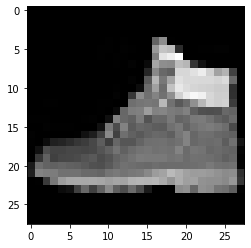

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
digit=90
a=x_train[digit]
plt.imshow(a,cmap='gray',interpolation='nearest')
print("image (#{}): which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

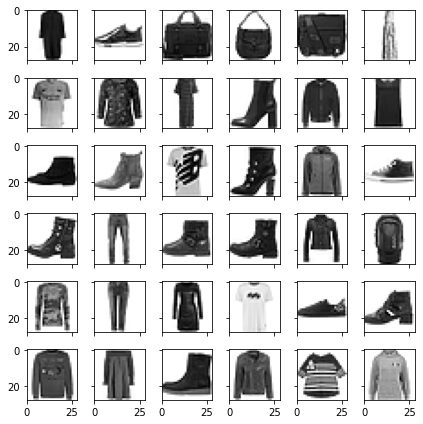

In [17]:
import random 
ROWS =6
random_indices=random.sample(range(x_train.shape[0]), ROWS*ROWS)
sample_images=x_train[random_indices,:]
plt.clf()
fig,axes=plt.subplots(ROWS,ROWS,
                     figsize=(ROWS,ROWS),
                     sharex=True, sharey=True)
for i in range (ROWS*ROWS):
    subplot_row=i//ROWS
    subplot_col=i%ROWS
    ax=axes[subplot_row,subplot_col]
    
    plottable_image=np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image,cmap='gray_r')
    ax.set_xbound([0,28])
plt.tight_layout()
plt.show()

In [18]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10 
epochs = 12

img_rows, img_cols = 28,28
if K.image_data_format() == 'channels_first':
    x_train=x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test=x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape=(1, img_rows, img_cols)
else: 
    x_train=x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test=x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape=(img_rows, img_cols, 1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('training samples: {}'.format(x_train.shape[0]))
print('test samples: {}'.format(x_test.shape[0]))

x_train shape: (60000, 28, 28, 1)
training samples: 60000
test samples: 10000


In [19]:
y_train=tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test=tensorflow.keras.utils.to_categorical(y_test, num_classes)
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())         
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [20]:
import tensorflow as tf
import time 
start_time=time.time()
model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=2,
         validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss: {}'.format(score[0]))
print('test accuracy: {}'.format(score[1]))

Epoch 1/12
469/469 - 97s - loss: 0.4638 - accuracy: 0.8346 - val_loss: 0.3198 - val_accuracy: 0.8878 - 97s/epoch - 208ms/step
Epoch 2/12
469/469 - 95s - loss: 0.2919 - accuracy: 0.8950 - val_loss: 0.2690 - val_accuracy: 0.9035 - 95s/epoch - 202ms/step
Epoch 3/12
469/469 - 94s - loss: 0.2465 - accuracy: 0.9091 - val_loss: 0.2562 - val_accuracy: 0.9043 - 94s/epoch - 201ms/step
Epoch 4/12
469/469 - 94s - loss: 0.2145 - accuracy: 0.9207 - val_loss: 0.2481 - val_accuracy: 0.9099 - 94s/epoch - 200ms/step
Epoch 5/12
469/469 - 94s - loss: 0.1890 - accuracy: 0.9305 - val_loss: 0.2201 - val_accuracy: 0.9204 - 94s/epoch - 201ms/step
Epoch 6/12
469/469 - 93s - loss: 0.1661 - accuracy: 0.9378 - val_loss: 0.2162 - val_accuracy: 0.9231 - 93s/epoch - 199ms/step
Epoch 7/12
469/469 - 94s - loss: 0.1479 - accuracy: 0.9438 - val_loss: 0.2260 - val_accuracy: 0.9210 - 94s/epoch - 200ms/step
Epoch 8/12
469/469 - 92s - loss: 0.1318 - accuracy: 0.9506 - val_loss: 0.2141 - val_accuracy: 0.9253 - 92s/epoch - 196

# Import Dataset Pilihan

In [21]:
df = pd.read_csv('age_gender.csv')

df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


# Description

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


Berdasarkan info(), ditemukan:
1. Terdapat 23705 baris dan 5 kolom. 
2. Terdapat 3 data numerik dan 2 data kategorikal. 
3. Tidak ada missing value.

Kesimpulan:
- Tidak perlu dilakukan handling missing value
- Tidak perlu melakukan encoding
- Hanya perlu me-reshape kolom pixels agar dapat digunakan untuk 48 x 48. Dalam kasus ini, dilakukan split untuk memecah 48 x 48 dari satu kolom menjadi 2304 kolom.

## Menentukan kolom target dari age, ethnicity, dan gender

In [23]:
print (df['age'].unique())
print (df['ethnicity'].unique())
print (df['gender'].unique())

[  1  10 100 101 103 105  11 110 111 115 116  12  13  14  15  16  17  18
  19   2  20  21  22  23  24  25  26  27  28  29   3  30  31  32  33  34
  35  36  37  38  39   4  40  41  42  43  44  45  46  47  48  49   5  50
  51  52  53  54  55  56  57  58  59   6  60  61  62  63  64  65  66  67
  68  69   7  70  71  72  73  74  75  76  77  78  79   8  80  81  82  83
  84  85  86  87  88  89   9  90  91  92  93  95  96  99]
[2 3 4 0 1]
[0 1]


Diambil ethnicity untuk target. Dalam kasus ini, ethnicity diambil karena age punya terlalu banyak kelas untuk diprediksi (data kontinu), sementara gender hanya ada 2 kelas (biner).

# Preprocessing

Sekarang, kita membuat X dan y. X akan memiliki 2304 kolom dan 23705 baris. Untuk sekarang, kita split, lalu dibuat DataFrame baru.

In [24]:
pixel_list = df['pixels'].str.split(' ')

pixel_list[:5]

0    [129, 128, 128, 126, 127, 130, 133, 135, 139, ...
1    [164, 74, 111, 168, 169, 171, 175, 182, 184, 1...
2    [67, 70, 71, 70, 69, 67, 70, 79, 90, 103, 116,...
3    [193, 197, 198, 200, 199, 200, 202, 203, 204, ...
4    [202, 205, 209, 210, 209, 209, 210, 211, 212, ...
Name: pixels, dtype: object

In [25]:
X = pd.DataFrame(pixel_list.tolist())

print (X.shape)
X.head()

(23705, 2304)


,0,1,2,3,4,5,6,...,2297,2298,2299,2300,2301,2302,2303
0,129,128,128,126,127,130,133,...,138,142,144,144,146,146,146
1,164,74,111,168,169,171,175,...,241,236,232,204,182,170,148
2,67,70,71,70,69,67,70,...,116,117,117,115,112,111,108
3,193,197,198,200,199,200,202,...,228,228,230,231,235,239,246
4,202,205,209,210,209,209,210,...,167,168,171,171,167,163,161


In [26]:
y = df['ethnicity']

y[:5]

0    2
1    2
2    2
3    2
4    2
Name: ethnicity, dtype: int64

Kita telah berhasil membuat X dan y.

## Normalisasi

Kita akan menormalisasi X sehingga range datanya hanya 0-1

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Columns: 2304 entries, 0 to 2303
dtypes: object(2304)
memory usage: 416.7+ MB


Berdasarkan info(), dapat dilihat pada dtypes, bahwa semua kolom pixels bertipe data kategorikal. Dalam kasus ini, dilakukan astype untuk mengubah tipe data menjadi int sebelum dinormalisasikan.

In [31]:
X = X.astype('int64')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Columns: 2304 entries, 0 to 2303
dtypes: int64(2304)
memory usage: 416.7 MB


In [33]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

X_norm = norm.fit_transform(X)

In [34]:
X_norm[:5]

array([[0.50588235, 0.50196078, 0.50196078, ..., 0.57254902, 0.57254902,
        0.57254902],
       [0.64313725, 0.29019608, 0.43529412, ..., 0.71372549, 0.66666667,
        0.58039216],
       [0.2627451 , 0.2745098 , 0.27843137, ..., 0.43921569, 0.43529412,
        0.42352941],
       [0.75686275, 0.77254902, 0.77647059, ..., 0.92156863, 0.9372549 ,
        0.96470588],
       [0.79215686, 0.80392157, 0.81960784, ..., 0.65490196, 0.63921569,
        0.63137255]])

Kita telah berhasil menormalisasi X.

## Training-Testing

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print (X_train.shape)
print (X_test.shape)

(18964, 2304)
(4741, 2304)


Dibagi 80:20.

# CNN

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [18]:
num_classes = 5

Parameter 1 dengan relu

In [19]:
batch_size1 = 32
epochs1 = 12

Parameter 2 dengan sigmoid

In [20]:
batch_size2 = 128
epochs2 = 24

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
    

print (X_train.shape)
print (X_test.shape)

(18964, 48, 48, 1)
(4741, 48, 48, 1)


Dilakukan reshape agar dapat digunakan di model, di mana input_shapenya adalah 48 x 48 dengan 1 channel, yaitu black and white.

In [22]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

print (y_train[:5])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


Diubah jadi binary, sehingga hasilnya seperti dilakukan one-hot encoding

## Membuat model untuk relu

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Dibuat model dengan activationnya relu.

## Model Training

In [24]:
import time

start_time = time.time()

model.fit(X_train,y_train,
          batch_size=batch_size1,
          epochs=epochs1,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test,y_test, verbose=0)

elapsed_time = time.time() - start_time

Epoch 1/12
593/593 - 142s - loss: 2.2862 - accuracy: 0.5641 - val_loss: 0.8675 - val_accuracy: 0.6982 - 142s/epoch - 240ms/step
Epoch 2/12
593/593 - 151s - loss: 0.9415 - accuracy: 0.6675 - val_loss: 0.8137 - val_accuracy: 0.7161 - 151s/epoch - 254ms/step
Epoch 3/12
593/593 - 154s - loss: 0.8501 - accuracy: 0.6992 - val_loss: 0.7795 - val_accuracy: 0.7264 - 154s/epoch - 260ms/step
Epoch 4/12
593/593 - 154s - loss: 0.7785 - accuracy: 0.7219 - val_loss: 0.7476 - val_accuracy: 0.7355 - 154s/epoch - 260ms/step
Epoch 5/12
593/593 - 154s - loss: 0.7415 - accuracy: 0.7366 - val_loss: 0.7381 - val_accuracy: 0.7439 - 154s/epoch - 259ms/step
Epoch 6/12
593/593 - 156s - loss: 0.6703 - accuracy: 0.7615 - val_loss: 0.8058 - val_accuracy: 0.7336 - 156s/epoch - 262ms/step
Epoch 7/12
593/593 - 155s - loss: 0.6405 - accuracy: 0.7718 - val_loss: 0.7538 - val_accuracy: 0.7486 - 155s/epoch - 261ms/step
Epoch 8/12
593/593 - 157s - loss: 0.5975 - accuracy: 0.7855 - val_loss: 0.7255 - val_accuracy: 0.7587 - 

Prosesnya memakan waktu, namun dapat dilihat terdapat 12 epochs.

## Evaluation

In [33]:
print ('Test loss: {}'.format(score[0]))
print ('Test accuracy: {}'.format(score[1]))

print('Elapsed time: {:.0f} seconds'.format(elapsed_time))

Test loss: 0.8716346621513367
Test accuracy: 0.7595443725585938
Elapsed time: 1842 seconds


Lossnya sebesar 87%, dan akurasinya 76%. Selain itu, waktu yang dibutuhkan adalah 1842 detik atau 30 menit.

## Model 2 untuk sigmoid

In [34]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                 activation='sigmoid',
                 input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3,3),
                 activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Sementara itu, di sini activationnya sigmoid.

## Model Training

In [35]:
import time

start_time = time.time()

model.fit(X_train,y_train,
          batch_size=batch_size2,
          epochs=epochs2,
          verbose=2,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test,y_test, verbose=0)

elapsed_time = time.time() - start_time

Epoch 1/24
149/149 - 132s - loss: 1.8118 - accuracy: 0.3648 - val_loss: 1.4503 - val_accuracy: 0.4265 - 132s/epoch - 888ms/step
Epoch 2/24
149/149 - 137s - loss: 1.5348 - accuracy: 0.3822 - val_loss: 1.4500 - val_accuracy: 0.4265 - 137s/epoch - 921ms/step
Epoch 3/24
149/149 - 139s - loss: 1.4914 - accuracy: 0.4126 - val_loss: 1.4496 - val_accuracy: 0.4265 - 139s/epoch - 931ms/step
Epoch 4/24
149/149 - 140s - loss: 1.4705 - accuracy: 0.4238 - val_loss: 1.4498 - val_accuracy: 0.4265 - 140s/epoch - 942ms/step
Epoch 5/24
149/149 - 139s - loss: 1.4581 - accuracy: 0.4249 - val_loss: 1.4500 - val_accuracy: 0.4265 - 139s/epoch - 932ms/step
Epoch 6/24
149/149 - 140s - loss: 1.4561 - accuracy: 0.4248 - val_loss: 1.4513 - val_accuracy: 0.4265 - 140s/epoch - 943ms/step
Epoch 7/24
149/149 - 139s - loss: 1.4553 - accuracy: 0.4248 - val_loss: 1.4559 - val_accuracy: 0.4265 - 139s/epoch - 933ms/step
Epoch 8/24
149/149 - 139s - loss: 1.4530 - accuracy: 0.4248 - val_loss: 1.4503 - val_accuracy: 0.4265 - 

Prosesnya lebih lama, karena epochnya 24.

## Evaluation

In [36]:
print ('Test loss: {}'.format(score[0]))
print ('Test accuracy: {}'.format(score[1]))

print('Elapsed time: {:.0f} seconds'.format(elapsed_time))

Test loss: 1.4511436223983765
Test accuracy: 0.426492303609848
Elapsed time: 3338 seconds


Lossnya jauh lebih besar, yaitu 145%. Tak hanya itu, akurasinya sangat rendah, yaitu 42%. Terakhir, waktu yang dibutuhkan adalah 3338 detik atau 55 menit.

Dapat disimpulkan bahwa hasilnya sangat buruk di percobaan kedua dengan sigmoid. Namun, terdapat kemungkinan bahwa pembuatan modelnya yang tidak cocok untuk sigmoid.

---

### Kesimpulan


Simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang dipilih: 

Dalam percobaan ini, dilakukan pengujian model Convolutional Neural Network (CNN) dengan mengombinasikan parameter batch size, epoch, dan jenis aktivasi. Pada percobaan sigmoid pertama, nilai parameter batch size, epoch, dan jenis aktivasi adalah batch size 32, epoch 12, dan jenis aktivasi ReLu, sedangkan pada percobaan kedua nilai parameter adalah batch size 128, epoch 24, dan jenis aktivasi Sigmoid. Sigmoid pertama memiliki akurasi yang lebih baik dibandingkan sigmoid dengan loss lebih besar (1.4 dan 0.4).

Pada epoch yang lebih rendah dan batch size yang lebih rendah, hasilnya lebih cepat, namun saat epoch dan batch size jauh lebih besar, hasilnya lebih lama.

In [42]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Gempar Bambang Godata
NIM: 		00000056133
Time-stamp:	2023-04-17 16:27:19.259079


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [44]:
!jupyter nbconvert --to html "./IF540L_Kelas_A_laporan_M08_00000067643_GemparBambangGodata.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_A_laporan_M08_00000067643_GemparBambangGodata.ipynb to html
[NbConvertApp] Writing 952413 bytes to IF540L_Kelas_A_laporan_M08_00000067643_GemparBambangGodata.html
